In [1]:
#Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import time
import numpy as np
from scipy.sparse import diags
from numpy.linalg import inv, norm, solve

# a) Iterative Methods

In [2]:
#Initilization
n_list = [4, 16, 64, 256, 1024]
diff = 0.0001
values = [-1, 4, -1]
w = 1.3
Jacobian_times = []
Gauss_Seidel_times = []
SOR_times= []

Jacobian_errors = []
Gauss_Seidel_errors = []
SOR_errors = []

### 1. Jacobian

In [3]:
def solve_Jacobian_tridiagonal(A, b, n, diff):
    """ 
    Solve Ax = b with Jacobian method and iterate until 
    we have diffrence less than 0.0001
    """
    
    print("Start Jacobian method for n = ", n,'\n')
    
    #Define L, D, U 
    L = np.tril(A, k = -1)
    U = np.triu(A, k = 1)
    D = np.diag(np.diag(A))
    
    #Initial Guess
    X = []
    X.append(np.zeros(n))
    print('First Guess =', X[0])
    
    #Iteration
    i = 0
    start = time.time()
    while True:
        i += 1
        X.append(np.dot(inv(D), (b - np.dot((L + U),X[-1]))))
        if norm(X[-1] - X[-2]) < diff:
             break 
        print("iteration", i, "=", X[-1])  
    finish = time.time()
    seconds = finish - start
    print("\nFinal Answer is:", X[-2])
    return seconds, X[-2]


#Solve for differnt n
for n in n_list:
    a = np.array([values[0] * np.ones(n-1), values[1] * np.ones(n), values[2] * np.ones(n-1)])
    offset = [-1,0,1]
    A = diags(a,offset).toarray()
    b = np.ones(n)
    seconds, final_answer = solve_Jacobian_tridiagonal(A, b, n, diff)
    exact_sol = solve(A,b)
    error = norm(exact_sol - final_answer)
    
    Jacobian_times.append(seconds)
    Jacobian_errors.append(error)
    print("\n")

Start Jacobian method for n =  4 

First Guess = [0. 0. 0. 0.]
iteration 1 = [0.25 0.25 0.25 0.25]
iteration 2 = [0.3125 0.375  0.375  0.3125]
iteration 3 = [0.34375  0.421875 0.421875 0.34375 ]
iteration 4 = [0.35546875 0.44140625 0.44140625 0.35546875]
iteration 5 = [0.36035156 0.44921875 0.44921875 0.36035156]
iteration 6 = [0.36230469 0.45239258 0.45239258 0.36230469]
iteration 7 = [0.36309814 0.45367432 0.45367432 0.36309814]
iteration 8 = [0.36341858 0.45419312 0.45419312 0.36341858]
iteration 9 = [0.36354828 0.45440292 0.45440292 0.36354828]
iteration 10 = [0.36360073 0.4544878  0.4544878  0.36360073]

Final Answer is: [0.36360073 0.4544878  0.4544878  0.36360073]


Start Jacobian method for n =  16 

First Guess = [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
iteration 1 = [0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25
 0.25 0.25]
iteration 2 = [0.3125 0.375  0.375  0.375  0.375  0.375  0.375  0.375  0.375  0.375
 0.375  0.375  0.375  0.375  0.375  0

iteration 1 = [0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25
 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25
 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25
 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25
 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25
 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25
 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25
 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25
 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25
 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25
 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25
 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25
 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25
 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.

iteration 1 = [0.25 0.25 0.25 ... 0.25 0.25 0.25]
iteration 2 = [0.3125 0.375  0.375  ... 0.375  0.375  0.3125]
iteration 3 = [0.34375  0.421875 0.4375   ... 0.4375   0.421875 0.34375 ]
iteration 4 = [0.35546875 0.4453125  0.46484375 ... 0.46484375 0.4453125  0.35546875]
iteration 5 = [0.36132812 0.45507812 0.47851562 ... 0.47851562 0.45507812 0.36132812]
iteration 6 = [0.36376953 0.45996094 0.48461914 ... 0.48461914 0.45996094 0.36376953]
iteration 7 = [0.36499023 0.46209717 0.4876709  ... 0.4876709  0.46209717 0.36499023]
iteration 8 = [0.36552429 0.46316528 0.48905945 ... 0.48905945 0.46316528 0.36552429]
iteration 9 = [0.36579132 0.46364594 0.48975372 ... 0.48975372 0.46364594 0.36579132]
iteration 10 = [0.36591148 0.46388626 0.49007416 ... 0.49007416 0.46388626 0.36591148]
iteration 11 = [0.36597157 0.46399641 0.49023438 ... 0.49023438 0.46399641 0.36597157]
iteration 12 = [0.3659991  0.46405149 0.49030912 ... 0.49030912 0.46405149 0.3659991 ]
iteration 13 = [0.36601287 0.46407706

### 2. Gauss–Seidel

In [4]:
def solve_Gauss_Seidel_tridiagonal(A, b, n, diff):
    """ 
    Solve Ax = b with Gauss-Seidel method and iterate until 
    we have diffrence less than 0.0001
    """
    
    print("Start Gauss-Seidel method for n = ", n,'\n')
    
    #Define L, D, U 
    L = np.tril(A, k = -1)
    U = np.triu(A, k = 1)
    D = np.diag(np.diag(A))

    #Initial Guess
    X = []
    X.append(np.zeros(n))
    print('First Guess =', X[0])
    
    #Iteration
    i = 0
    start = time.time()
    while True:
        i += 1
        X.append(np.dot(inv(D + L), b - np.dot(U, X[-1]) ))
        if norm(X[-1] - X[-2]) < diff:
             break 
        print("iteration", i, "=", X[-1])  
    finish = time.time()
    seconds = finish - start
    print("\nFinal Answer is:", X[-2])
    return seconds, X[-2]


#Solve for differnt n
for n in n_list:
    a = np.array([values[0] * np.ones(n-1), values[1] * np.ones(n), values[2] * np.ones(n-1)])
    offset = [-1,0,1]
    A = diags(a,offset).toarray()
    b = np.ones(n)
    seconds, final_answer = solve_Gauss_Seidel_tridiagonal(A, b, n, diff)
    exact_sol = solve(A,b)
    error = norm(exact_sol - final_answer)
    
    Gauss_Seidel_times.append(seconds)
    Gauss_Seidel_errors.append(error)

    print("\n")     

Start Gauss-Seidel method for n =  4 

First Guess = [0. 0. 0. 0.]
iteration 1 = [0.25       0.3125     0.328125   0.33203125]
iteration 2 = [0.328125   0.4140625  0.43652344 0.35913086]
iteration 3 = [0.35351562 0.44750977 0.45166016 0.36291504]
iteration 4 = [0.36187744 0.4533844  0.45407486 0.36351871]
iteration 5 = [0.3633461  0.45435524 0.45446849 0.36361712]
iteration 6 = [0.36358881 0.45451432 0.45453286 0.36363322]

Final Answer is: [0.36358881 0.45451432 0.45453286 0.36363322]


Start Gauss-Seidel method for n =  16 

First Guess = [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
iteration 1 = [0.25       0.3125     0.328125   0.33203125 0.33300781 0.33325195
 0.33331299 0.33332825 0.33333206 0.33333302 0.33333325 0.33333331
 0.33333333 0.33333333 0.33333333 0.33333333]
iteration 2 = [0.328125   0.4140625  0.43652344 0.44238281 0.44390869 0.44430542
 0.44440842 0.44443512 0.44444203 0.44444382 0.44444428 0.4444444
 0.44444443 0.44444444 0.44444444 0.36111111]
iteration 3 = [0

iteration 2 = [0.328125   0.4140625  0.43652344 ... 0.44444444 0.44444444 0.36111111]
iteration 3 = [0.35351562 0.44750977 0.47247314 ... 0.48148148 0.46064815 0.36516204]
iteration 4 = [0.36187744 0.45858765 0.48442078 ... 0.48861883 0.46344522 0.3658613 ]
iteration 5 = [0.36464691 0.46226692 0.48839617 ... 0.49002138 0.46397067 0.36599267]
iteration 6 = [0.36556673 0.46349072 0.48971982 ... 0.49030579 0.46407461 0.36601865]
iteration 7 = [0.36587268 0.46389813 0.49016073 ... 0.49036499 0.46409591 0.36602398]
iteration 8 = [0.36597453 0.46403382 0.49030763 ... 0.49037757 0.46410039 0.3660251 ]
iteration 9 = [0.36600845 0.46407902 0.49035659 ... 0.49038029 0.46410135 0.36602534]
iteration 10 = [0.36601976 0.46409409 0.4903729  ... 0.49038089 0.46410156 0.36602539]
iteration 11 = [0.36602352 0.46409911 0.49037834 ... 0.49038102 0.4641016  0.3660254 ]

Final Answer is: [0.36602352 0.46409911 0.49037834 ... 0.49038102 0.4641016  0.3660254 ]




### 3. SOR

In [5]:
def solve_SOR_tridiagonal(A, b, w, n, diff):
    """ 
    Solve Ax = b with SOR method and iterate until 
    we have diffrence less than 0.0001
    """
    
    print("Start SOR method for n = ", n,'\n')
    
    #Define L, D, U 
    L = np.tril(A, k = -1)
    U = np.triu(A, k = 1)
    D = np.diag(np.diag(A))

    #Initial Guess
    X = []
    X.append(np.zeros(n))
    print('First Guess =', X[0])
    
    #Iteration
    i = 0
    start = time.time()
    while True:
        i += 1
        X.append(np.dot(inv(D + w * L), w * b + np.dot( (1-w) * D - w * U, X[-1]) ))
        if norm(X[-1] - X[-2]) < diff:
             break 
        print("iteration", i, "=", X[-1])  
    finish = time.time()
    seconds = finish - start
    print("\nFinal Answer is:", X[-2])
    return seconds, X[-2]

#Solver for differnt n
for n in n_list:
    a = np.array([values[0] * np.ones(n-1), values[1] * np.ones(n), values[2] * np.ones(n-1)])
    offset = [-1,0,1]
    A = diags(a,offset).toarray()
    b = np.ones(n)
    seconds, final_answer = solve_SOR_tridiagonal(A, b, w, n, diff)
    exact_sol = solve(A,b)
    error = norm(exact_sol - final_answer)
    
    SOR_times.append(seconds)
    SOR_errors.append(error)

    print("\n")     

Start SOR method for n =  4 

First Guess = [0. 0. 0. 0.]
iteration 1 = [0.325      0.430625   0.46495313 0.47610977]
iteration 2 = [0.36745312 0.46634453 0.49181171 0.34200588]
iteration 3 = [0.36632604 0.46399141 0.4394056  0.36520506]
iteration 4 = [0.3658994  0.4475267  0.45731614 0.36406623]
iteration 5 = [0.36067636 0.45658955 0.45451829 0.36349857]
iteration 6 = [0.3651887  0.4544279  0.45447062 0.36365338]
iteration 7 = [0.36313246 0.45439263 0.45452377 0.36362421]
iteration 8 = [0.36373787 0.45461724 0.45457134 0.36364842]
iteration 9 = [0.36362924 0.45453002 0.45453659 0.36362987]

Final Answer is: [0.36362924 0.45453002 0.45453659 0.36362987]


Start SOR method for n =  16 

First Guess = [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
iteration 1 = [0.325      0.430625   0.46495313 0.47610977 0.47973567 0.48091409
 0.48129708 0.48142155 0.481462   0.48147515 0.48147942 0.48148081
 0.48148126 0.48148141 0.48148146 0.48148147]
iteration 2 = [0.36745312 0.46634453 0.49181171

iteration 1 = [0.325      0.430625   0.46495313 ... 0.48148148 0.48148148 0.48148148]
iteration 2 = [0.36745312 0.46634453 0.49181171 ... 0.49931413 0.49931413 0.34283265]
iteration 3 = [0.36632604 0.46399141 0.49007768 ... 0.4999746  0.44911812 0.36811359]
iteration 4 = [0.3658994  0.46399513 0.49034541 ... 0.4834707  0.46702946 0.3663505 ]
iteration 5 = [0.3660286  0.46412301 0.49040161 ... 0.49249755 0.46401678 0.3659003 ]
iteration 6 = [0.3660314  0.46410382 0.49037926 ... 0.49010309 0.46399607 0.36602863]
iteration 7 = [0.36602432 0.46410002 0.49038015 ... 0.49034635 0.46412305 0.3660314 ]
iteration 8 = [0.36602521 0.46410174 0.49038133 ... 0.49040165 0.46410383 0.36602432]
iteration 9 = [0.3660255  0.4641017  0.49038107 ... 0.49037926 0.46410002 0.36602521]
iteration 10 = [0.3660254  0.46410159 0.49038104 ... 0.49038015 0.46410174 0.3660255 ]
iteration 11 = [0.3660254  0.46410161 0.49038106 ... 0.49038133 0.4641017  0.3660254 ]

Final Answer is: [0.3660254  0.46410161 0.49038106 

# b) Comparison

### Time

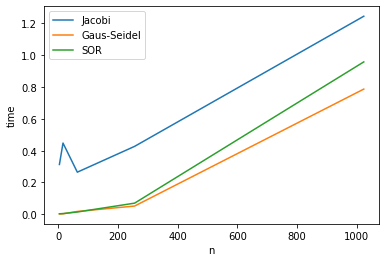

In [6]:
plt.plot(n_list,Jacobian_times, label = "Jacobi")
plt.plot(n_list,Gauss_Seidel_times, label = "Gaus-Seidel")
plt.plot(n_list,SOR_times, label = "SOR")
plt.ylabel("time")
plt.xlabel("n")
plt.legend()
plt.show()

## Accuaracy

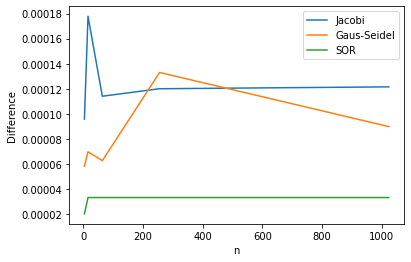

In [7]:
plt.plot(n_list,Jacobian_errors, label = "Jacobi")
plt.plot(n_list,Gauss_Seidel_errors, label = "Gaus-Seidel")
plt.plot(n_list,SOR_errors, label = "SOR")
plt.ylabel("Difference")
plt.xlabel("n")
plt.legend()
plt.show()

# LU

### Without Partial Pivoting

In [ ]:
def LU(A):
    
    """Find L and U that A = LU
    without pivoting"""
    
    start = time.time()
    n = A.shape[0]
    L = np.zeros((n,n))
    U = np.zeros((n,n))
    np.fill_diagonal(L, 1)

    for k in range(n-1):
        for i in range(k+1, n):
            if A[k,k] != 0:
                A[i,k] = A[i,k] / A[k,k]
            else:
                print("Failed!")
                break
                
            for j in range(k+1,n):      
                A[i,j] = A[i,j] - A[i,k]*A[k,j]

    for i in range(n):
        for j in range(n):
            if j >= i:
                U[i, j] = A[i, j]
            else:
                L[i, j] = A[i, j]
    finish = time.time()  
    return finish - start

lu_time = []
for n in n_list:
    a = np.array([values[0] * np.ones(n-1), values[1] * np.ones(n), values[2] * np.ones(n-1)])
    offset = [-1,0,1]
    A = diags(a,offset).toarray()
    lu_time.append(LU(A))
    
lu_time

### With Partial Pivoting

In [ ]:
def LU_pivot(A):
    
    """Find L and U that A = LU
    with pivoting"""
    
    start = time.time()
    n = A.shape[0]
    L = np.zeros((n,n))
    U = np.zeros((n,n))
    np.fill_diagonal(L, 1)

    piv = np.arange(0,n)
    
    for k in range(n-1):
        r = np.argmax(abs(A[k:n,k])) + k
        piv[[k, r]] = piv[[r, k]]
        A[[k, r]] = A[[r, k]]
 
        for i in range(k+1, n):          
            A[i, k] = A[i, k] / A[k, k]
            
            for j in range(k+1, n):      
                A[i, j] =  A[i, j] - A[i, k]*A[k, j] 
 

    for i in range(n):
        for j in range(n):
            if j >= i:
                U[i, j] = A[i, j]
            else:
                L[i, j] = A[i, j]
                
    finish = time.time()  
    return finish - start

lu_pivot_time = []
for n in n_list:
    a = np.array([values[0] * np.ones(n-1), values[1] * np.ones(n), values[2] * np.ones(n-1)])
    offset = [-1,0,1]
    A = diags(a,offset).toarray()
    lu_pivot_time.append(LU_pivot(A))
    
lu_pivot_time    

## Comparison

In [ ]:
mylist

In [ ]:
plt.plot(n_list,lu_time, label = "Without-Pivot")
plt.plot(n_list,lu_pivot_time, label = "With-Pivot")
plt.ylabel("time")
plt.xlabel("n")
plt.legend()
plt.show()

In [ ]:
mylist = []
for i in range(1000):
    mylist.append(i ** 3)
plt.plot(list(range(1000)),mylist, label = "N ^ 3")
plt.xlim(0, 1000)
plt.ylim(0, 1000 ** 3)
plt.legend()
plt.show()

## Prove O(N ^ 3)

In [ ]:
Ratio_lu = []
for i in range(1, 4):
    Ratio_lu.append(lu_time[i + 1] / lu_time[i])
Ratio_lu    

In [ ]:
sum(Ratio_lu) / len(Ratio_lu)

In [ ]:
Ratio_pivot_lu = []
for i in range(1, 4):
    Ratio_pivot_lu.append(lu_pivot_time[i + 1] / lu_pivot_time[i])
Ratio_pivot_lu    

In [ ]:
sum(Ratio_pivot_lu) / len(Ratio_pivot_lu)

می توان دید که با 4 برابر شدن بعد ماتریس، زمان اجرای الگوریتم به صورت میانگین تقریبا 64 برابر می شود